In [ ]:
"""Creates and evaluates SVM models that predict whether a patient has hypothyroid disease."""
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 


In [ ]:
# Read the hypothyroid data into a Pandas dataframe 
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/ChallengeProjects/Week1/allhypo.train.data.csv"
dataset = pd.read_csv(url) 


In [ ]:
# Clean up the dataset
# Delete an empty column
del dataset["TBG"]

# Replace "?"s with NaNs
dataset = dataset.replace("?", np.nan)


In [ ]:
# Modify the data to enable model creation through sklearn's SVC
# Replace female entries with a zero and male entries with a one
dataset['Sex'].replace("F", 0, inplace=True)
dataset['Sex'].replace("M", 1, inplace=True)

# Replace false entries with a zero and true entries with a one
dataset.replace("f", 0, inplace=True)
dataset.replace("t", 1, inplace=True)

# Remove patient numbers from the data  
for patient in range(dataset['class'].shape[0]):
  dataset['class'][patient] = dataset['class'][patient].split(".")[0]

# Condense the target's unique values into binary data
dataset['class'].replace('negative', 0, inplace=True)
dataset['class'].replace(["compensated hypothyroid", "primary hypothyroid", "secondary hypothyroid"], 1, inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# Cast numerics to floats (enable modeling)
numerics = ["Age", "TSH", "T3", "TT4", "T4u", "FTI"]

for numeric in numerics:
  dataset[numeric] = dataset[numeric].astype(float)

  # Replace NaNs with their respective column's median
  dataset[numeric].fillna(dataset[numeric].median(), inplace=True)
  
# Drop remaining NaN entries from the dataset
dataset = dataset.dropna()


In [ ]:
# We'll create an 80/20 split of training and testing data
test_size = .2

# Controls the shuffling applied to the dataframe before applying a split
# We'll use a different seed for each model to avoid overfitting
seed = 69


In [ ]:
# Split the dataset between training data (80%) and testing data (20%)
X_train, X_test, y_train, y_test = train_test_split(dataset[['On thyroxine', 'TSH']], dataset["class"], test_size=test_size, random_state=seed)

# Create a model with sklearn's SVC
svm = SVC(gamma=.5, C=.5)

# Train and fit the model with training data
svm.fit(X_train, y_train)

# Use the model to make a test prediction
y_test_pred = svm.predict(X_test)

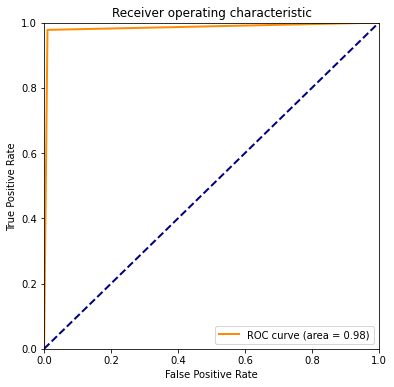

In [ ]:
from sklearn import metrics

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()